<a href="https://colab.research.google.com/github/Matu-Flash/portfolio-data-analytics/blob/main/Practica_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

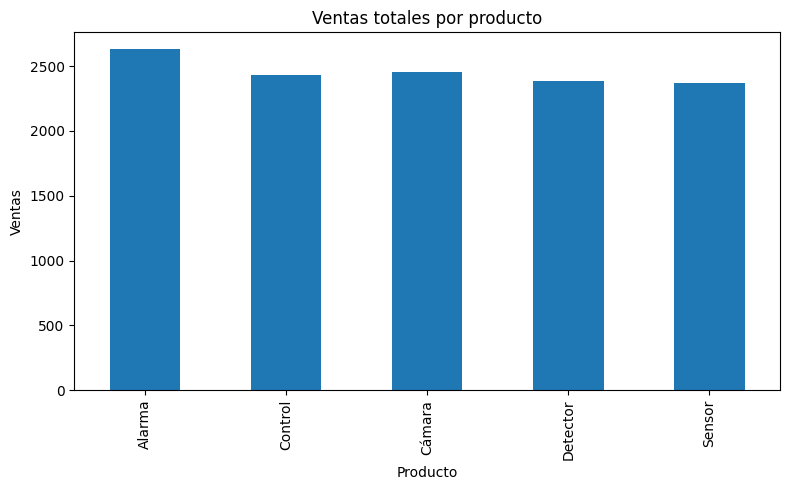

<Figure size 1000x600 with 0 Axes>

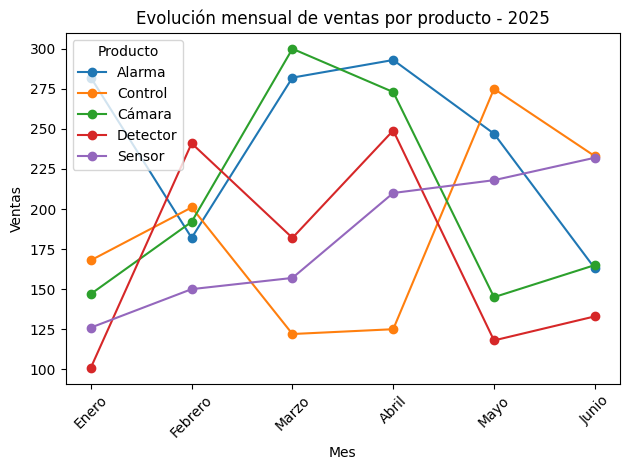

<Figure size 800x500 with 0 Axes>

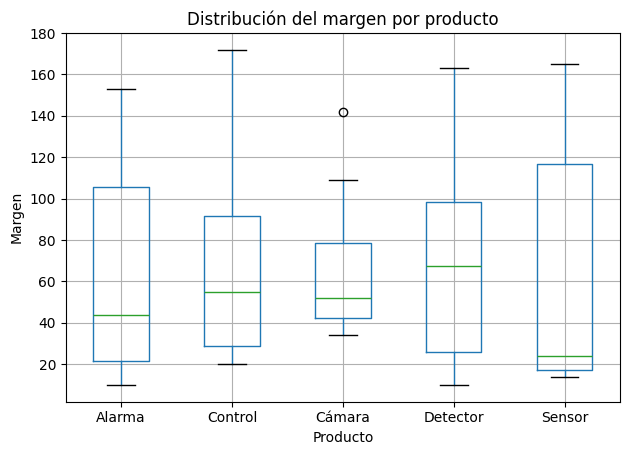

{'Excel generado': 'dataset_ventas_random.xlsx', 'Gráfico 1': 'ventas_totales_producto.png', 'Gráfico 2': 'evolucion_mensual_2025.png', 'Gráfico 3': 'margen_por_producto.png'}


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Listas de productos y meses
productos = ["Alarma", "Cámara", "Sensor", "Control", "Detector"]
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio"]

# Generar datos aleatorios
data = []
for año in [2024, 2025]:
    for mes in meses:
        for producto in productos:
            ventas = random.randint(100, 300)
            costo = random.randint(80, ventas - 10)
            data.append([producto, ventas, costo, año, mes])

# Crear DataFrame
df_full = pd.DataFrame(data, columns=["Producto", "Ventas", "Costo", "Año", "Mes"])
df_full["Margen"] = df_full["Ventas"] - df_full["Costo"]

# Guardar como Excel (en la misma carpeta del script)
excel_path = "dataset_ventas_random.xlsx"
df_full.to_excel(excel_path, index=False)

# Gráfico 1: Ventas por producto
ventas_por_producto = df_full.groupby("Producto")["Ventas"].sum()
plt.figure(figsize=(8, 5))
ventas_por_producto.plot(kind="bar")
plt.title("Ventas totales por producto")
plt.ylabel("Ventas")
plt.xlabel("Producto")
plt.tight_layout()
plt.savefig("ventas_totales_producto.png")
plt.show()
plt.close()

# Gráfico 2: Evolución mensual de ventas por producto - 2025
df_2025 = df_full[df_full["Año"] == 2025]
ventas_mensuales = df_2025.groupby(["Mes", "Producto"])["Ventas"].sum().unstack()
ventas_mensuales = ventas_mensuales.reindex(index=meses)

plt.figure(figsize=(10, 6))
ventas_mensuales.plot(marker='o')
plt.title("Evolución mensual de ventas por producto - 2025")
plt.ylabel("Ventas")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("evolucion_mensual_2025.png")
plt.show()
plt.close()

# Gráfico 3: Margen por producto (boxplot)
plt.figure(figsize=(8, 5))
df_full.boxplot(column="Margen", by="Producto")
plt.title("Distribución del margen por producto")
plt.suptitle("")
plt.ylabel("Margen")
plt.tight_layout()
plt.savefig("margen_por_producto.png")
plt.show()
plt.close()

# Mostrar rutas de los archivos generados (opcional en entorno interactivo)
print({
    "Excel generado": excel_path,
    "Gráfico 1": "ventas_totales_producto.png",
    "Gráfico 2": "evolucion_mensual_2025.png",
    "Gráfico 3": "margen_por_producto.png"
})
